In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

## Reading dataset

In [3]:
dataSet = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
                      names=['parents','has_nurs','form','children','housing','finance','social','health','Application status'])

## Data analysis

In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   parents             12960 non-null  object
 1   has_nurs            12960 non-null  object
 2   form                12960 non-null  object
 3   children            12960 non-null  object
 4   housing             12960 non-null  object
 5   finance             12960 non-null  object
 6   social              12960 non-null  object
 7   health              12960 non-null  object
 8   Application status  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [5]:
dataSet.head(10)

,parents,has_nurs,form,children,housing,finance,social,health,Application status
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


In [6]:
## Finding number of null values in each column
cols = dataSet.columns
for col in cols :
    print(col,' : ',dataSet[col].isnull().sum())

parents  :  0
has_nurs  :  0
form  :  0
children  :  0
housing  :  0
finance  :  0
social  :  0
health  :  0
Application status  :  0


In [7]:
## Finding unique values of each column
for col in cols :
    print(dataSet[col].unique())

['usual' 'pretentious' 'great_pret']
['proper' 'less_proper' 'improper' 'critical' 'very_crit']
['complete' 'completed' 'incomplete' 'foster']
['1' '2' '3' 'more']
['convenient' 'less_conv' 'critical']
['convenient' 'inconv']
['nonprob' 'slightly_prob' 'problematic']
['recommended' 'priority' 'not_recom']
['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']


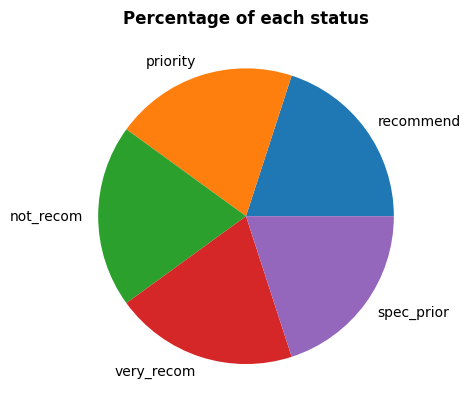

In [11]:
## finding proportion of each status in the data
statusList = dataSet['Application status'].unique()
lst = []
for status in statusList :
    lst.append(len(dataSet['Application status']==status))
plt.pie(lst,labels=statusList)
plt.title('Percentage of each status',weight='bold')
plt.show()

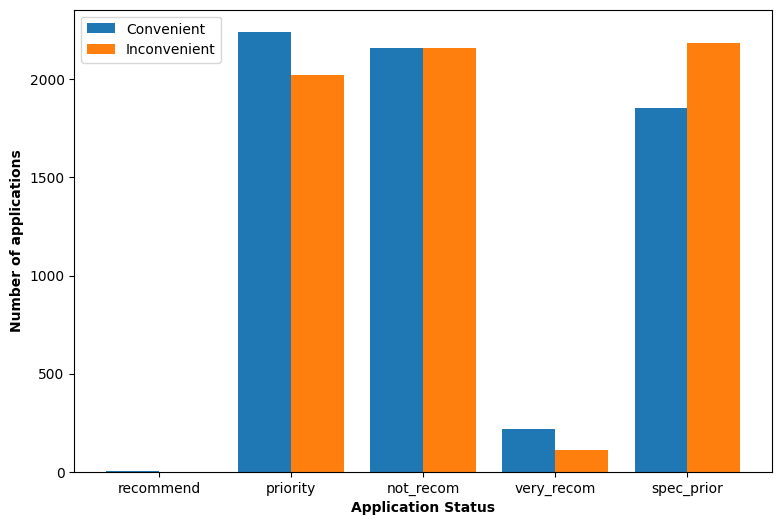

In [12]:
convenient = []
inconvenient = []
for status in statusList :
    lst = dataSet[dataSet['Application status']==status]
    convenient.append(len(lst[lst['finance']=='convenient']))
    inconvenient.append(len(lst[lst['finance']=='inconv']))
xAxis = np.arange(len(convenient))
plt.figure(figsize=(9,6))
plt.bar(xAxis-0.2,convenient,0.4,label='Convenient')
plt.bar(xAxis+0.2,inconvenient,0.4,label='Inconvenient')
plt.xticks(xAxis,statusList)
plt.xlabel('Application Status',weight='bold')
plt.ylabel('Number of applications',weight='bold')
plt.legend()
plt.show()

## SVM parameter tuning

In [13]:
dataSet = pd.get_dummies(dataSet,drop_first=True,
                         columns=['parents','has_nurs','form','children','housing','finance','social','health'])

In [14]:
len(dataSet.columns)

20

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
bestValues = []
bestAccuracies = []
bestTill = -9999
def findAccuracy(nu,tol,kernel,xTrain,xTest,yTrain,yTest) :
    model = svm.NuSVC(nu=nu,kernel=kernel,tol=tol)
    model.fit(xTrain,yTrain)
    yPred = model.predict(xTest)
    return accuracy_score(yPred,yTest)

In [16]:
for i in range(10) :
    data = dataSet.sample(frac=0.1,replace=False,random_state=i*10)
    x = data.drop('Application status',axis=1)
    y = data['Application status']
    xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.3,random_state=i*10)
    maxi = -9999
    bestNu = 0
    bestTol = 0
    bestKernel = ''
    accuracies = []
    j=0
    while j < 1000 :
        nu = random.random()*0.1
        tol = random.random()*0.005
        kernel = random.sample(kernels,1)
        try :
            acc = findAccuracy(nu,tol,kernel[0],xTrain,xTest,yTrain,yTest)
            accuracies.append(acc)
            if acc > maxi :
                maxi = acc
                bestNu = nu
                bestTol = tol
                bestKernel = kernel[0]
            j += 1
        except :
            pass
        
    if maxi > bestTill :
        bestTill = maxi
        bestAccuracies = accuracies

    bestValues.append(['S'+str(i+1),maxi,bestNu,bestTol,bestKernel])

In [17]:
## creating final table of Nu, Tolerance and Kernel which gives best accuracy for each sample
finalTable = pd.DataFrame(bestValues,columns=['Samples','Best Accuracy','Best Nu','Best Tolerance','Best Kernel'])
finalTable

,Samples,Best Accuracy,Best Nu,Best Tolerance,Best Kernel
0,S1,0.951157,0.007447,0.004035,rbf
1,S2,0.961440,0.005616,0.003566,rbf
2,S3,0.958869,0.062464,0.002134,rbf
3,S4,0.948586,0.018556,0.002032,rbf
4,S5,0.961440,0.009353,0.002923,rbf
5,S6,0.964010,0.005235,0.004024,rbf
6,S7,0.956298,0.010372,0.004237,rbf
7,S8,0.940874,0.002662,0.003700,rbf
8,S9,0.961440,0.003094,0.001614,rbf
9,S10,0.961440,0.073159,0.004174,rbf


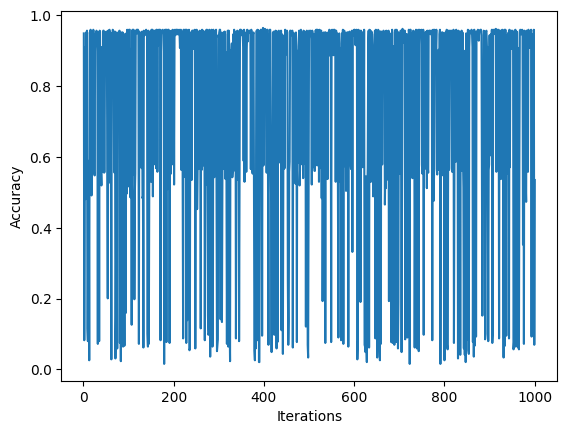

In [18]:
bestAccuracies = np.array(bestAccuracies)
plt.plot(np.arange(1,1001,1),bestAccuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()